# AirWave: Predictive Modeling of Passenger Numbers

### Presented by **N.Ashra**


###  **iPEC Solutions Pvt.Ltd** 

Accurate forecasting of air passenger numbers is crucial for optimizing airline operations, improving airport management, and enhancing passenger experience. **AirWave** is a predictive modeling system developed to forecast air passenger traffic using historical data and advanced time series analysis techniques. By analyzing patterns and trends within past passenger data, AirWave aims to provide reliable predictions that can help airlines and airports make informed decisions regarding resource allocation, scheduling, and capacity planning.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df =pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [8]:
df["Month"]=pd.to_datetime(df["Month"])
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [10]:
df.set_index("Month",inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


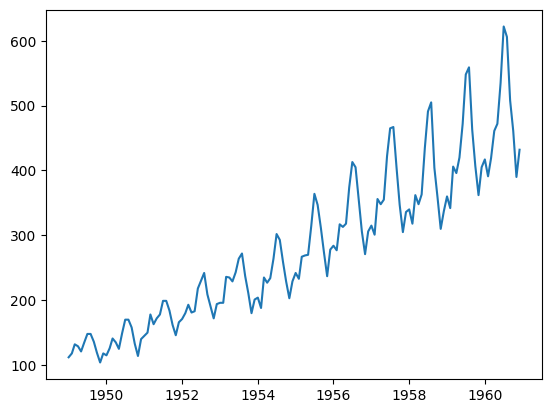

In [11]:
plt.plot(df["#Passengers"])

In [13]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_=adfuller(df)

In [14]:
print(pvalue) #if pvalue > 0.05 then data is not stationary

0.9918802434376411


In [15]:
df["year"]=[d.year for d in df.index]
df

,#Passengers,year
Month,,
1949-01-01,112,1949
1949-02-01,118,1949
1949-03-01,132,1949
1949-04-01,129,1949
1949-05-01,121,1949
...,...,...
1960-08-01,606,1960
1960-09-01,508,1960
1960-10-01,461,1960


In [16]:
df["month"]=[d.strftime('%b') for d in df.index]
df

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


In [17]:
years=df['year'].unique()
years

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

<Axes: xlabel='year', ylabel='#Passengers'>

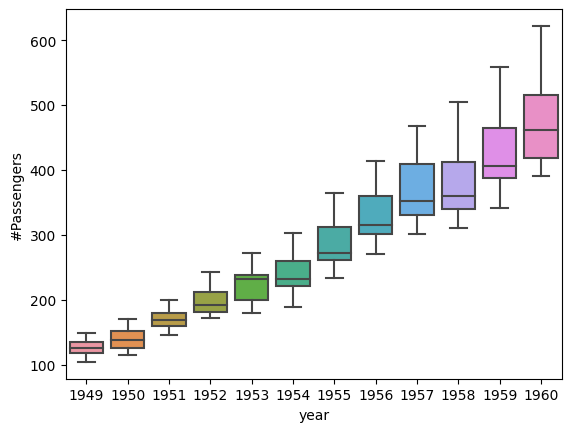

In [18]:
sns.boxplot(x='year',y='#Passengers',data=df)

<Axes: xlabel='month', ylabel='#Passengers'>

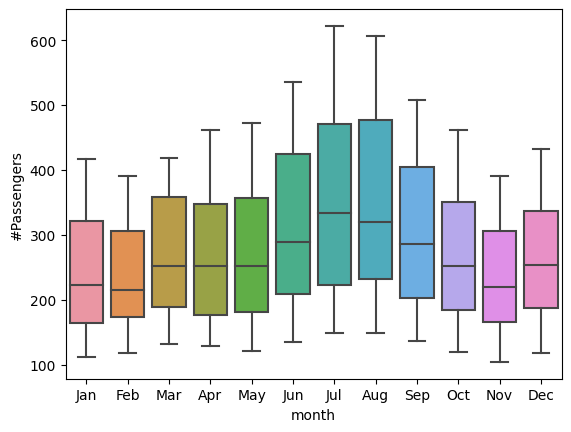

In [19]:
sns.boxplot(x='month',y='#Passengers',data=df)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(df["#Passengers"],
                             model='additive'
                             )

In [21]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

In [22]:
trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [23]:
sesonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [24]:
residual

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

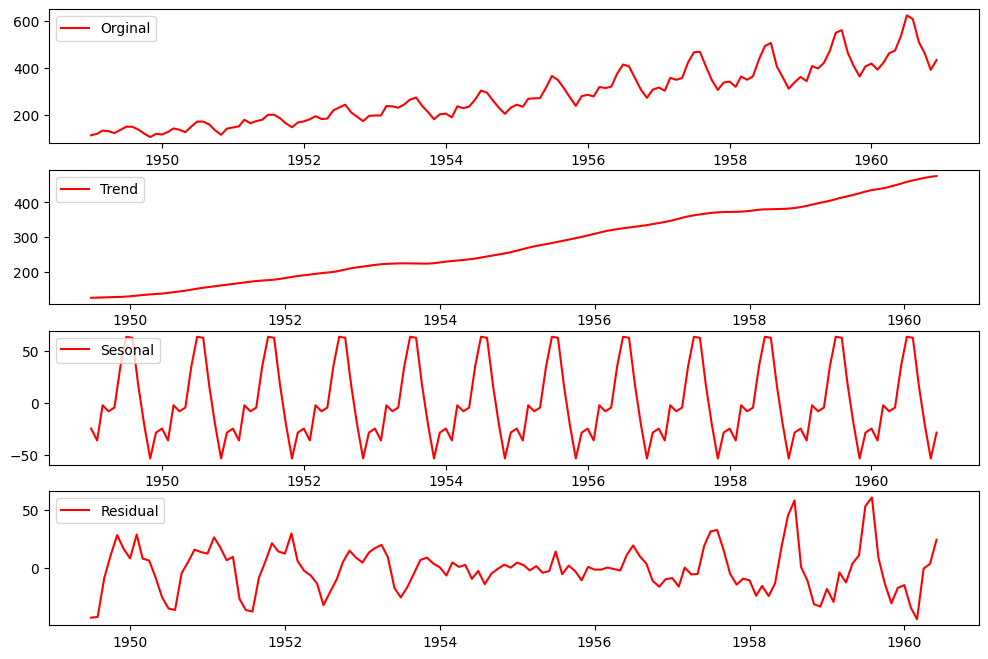

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df["#Passengers"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [26]:
!pip install pmdarima
from pmdarima.arima import auto_arima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - -------------------------------------- 30.7/614.7 kB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 92.2/614.7 kB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 194.6/614.7 kB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/614.7 kB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 450.6/614.7 kB 2.0 MB/s eta 0:00:01
   ----------------------------- ---------- 450.6/614.7 kB 2.0 MB/s eta 0:00:01
   ------------------------------------- -- 573.4/614.7 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
    --------------------------------------- 0.1/2.8 MB 3.4 MB/s eta 0:00:01
   - -------------------------------------- 0.1/2.8 MB 2.2 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [27]:
arima_model=auto_arima(df["#Passengers"],start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=12,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.11 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.16 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=1.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.08 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.16 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.23 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [28]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 19 Jul 2024   AIC                           1019.178
Time:                                     21:42:06   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
size=int(len(df)*0.66)
X_train,X_test=df[0:size],df[size:len(df)]

In [30]:
X_train.shape

(95, 3)

In [31]:
X_test.shape

(49, 3)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model=SARIMAX(X_train["#Passengers"],
             order=(0,1,1),
             seasonal_order=(2,1,1,12))
result=model.fit()
result.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Fri, 19 Jul 2024   AIC                            610.538
Time:                                    21:43:59   BIC                            622.571
Sample:                                01-01-1949   HQIC                           615.369
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3204      0.102     -3.152      0.002      -0.520      -0.121
ar.S.L12       0.6844      0.642      1.066      0.286      -0.574       1.943
ar.S.L24       0.3143      0.130      2.424      0.015       0.060       0.568
ma.S.L12      -0.9802      5.507     -0.178      0.859     -11.774       9.813
sigma2        78.6353    382.722      0.205      0.837    -671.486     828.757
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1949-01-01      0.000000
1949-02-01    111.998297
1949-03-01    117.999818
1949-04-01    131.999574
1949-05-01    129.000091
                 ...    
1956-07-01    419.547706
1956-08-01    398.687751
1956-09-01    365.408684
1956-10-01    320.668389
1956-11-01    274.821167
Freq: MS, Name: predicted_mean, Length: 95, dtype: float64

In [35]:
st_index=len(X_train)
ed_index=len(df)-1
predction=result.predict(st_index,ed_index)
predction

1956-12-01    311.118005
1957-01-01    320.273929
1957-02-01    310.949316
1957-03-01    351.868816
1957-04-01    349.894224
1957-05-01    355.079972
1957-06-01    411.910730
1957-07-01    457.120713
1957-08-01    445.109277
1957-09-01    395.846278
1957-10-01    347.121454
1957-11-01    309.233047
1957-12-01    352.347171
1958-01-01    361.463044
1958-02-01    351.175973
1958-03-01    394.610605
1958-04-01    392.136490
1958-05-01    398.706565
1958-06-01    459.563207
1958-07-01    505.880559
1958-08-01    493.952226
1958-09-01    440.479183
1958-10-01    388.485419
1958-11-01    349.248671
1958-12-01    394.136246
1959-01-01    404.216607
1959-02-01    392.540171
1959-03-01    437.985253
1959-04-01    435.805828
1959-05-01    443.381770
1959-06-01    507.254990
1959-07-01    556.282055
1959-08-01    543.149813
1959-09-01    487.026892
1959-10-01    432.882226
1959-11-01    391.814800
1959-12-01    438.857868
1960-01-01    449.585774
1960-02-01    436.655904
1960-03-01    484.267518


<Axes: xlabel='Month'>

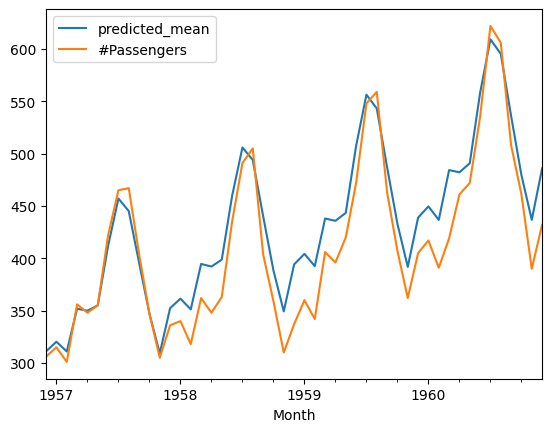

In [36]:
predction.plot(legend=True)
X_test["#Passengers"].plot(legend=True)

In [37]:
import math
from sklearn.metrics import mean_squared_error

In [38]:
trainScore=math.sqrt(mean_squared_error(X_train['#Passengers'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["#Passengers"],predction))
trainScore,testScore

(16.14271111720605, 29.516140226770617)

In [39]:
forcast=result.predict(start=len(df),
                      end=(len(df)-1)+3*12,
                      typ="levels").rename('Forecust')

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


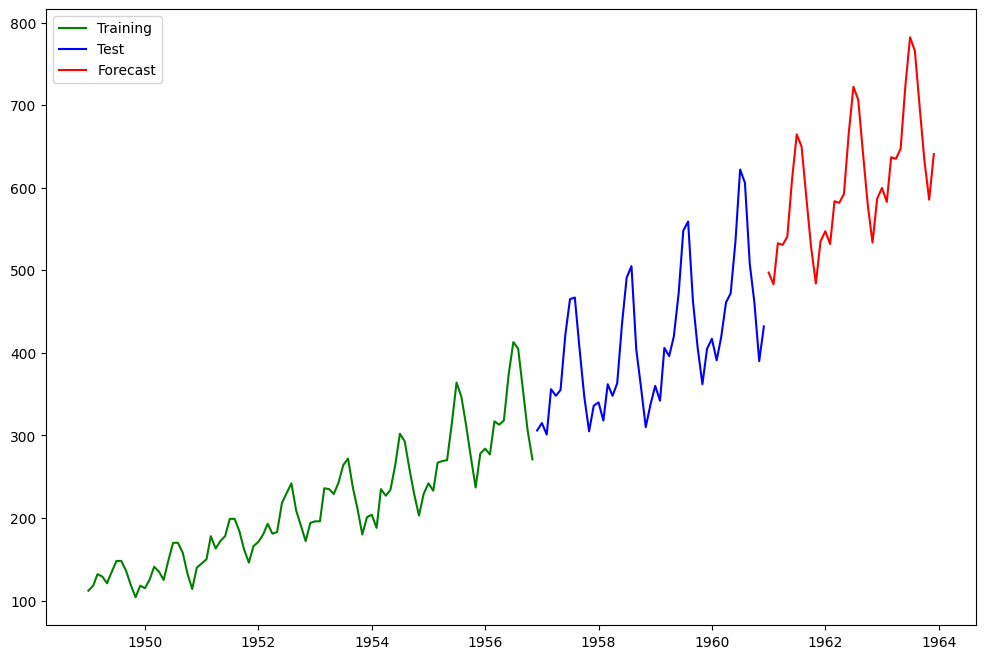

In [40]:
plt.figure(figsize=(12,8))
plt.plot(X_train["#Passengers"],label="Training",color='green')
plt.plot(X_test["#Passengers"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")